In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_df = pd.read_csv('./source/Dataset/analysis_copy.csv')

In [4]:
data_df.head()

,date,country,id,active,alco,ap_hi,ap_lo,cholesterol,gender,gluc,...,occupation,smoke,weight,disease,age_years,bmi,bp_normal,bp_elevated,bp_hypertension1,bp_hypertension2
0,2021-05-03,Indonesia,0,1,0,110,80,1,2,1,...,Architect,0,62.0,0,50,21.967120,0,0,1,0
1,2021-08-05,Malaysia,1,1,0,140,90,3,1,1,...,Accountant,0,85.0,1,55,34.927679,0,0,0,1
2,2022-11-13,Indonesia,2,0,0,130,70,3,1,1,...,Chef,0,64.0,1,51,23.507805,0,0,1,0
3,2018-10-31,Singapore,3,1,0,150,100,1,2,1,...,Lawyer,0,82.0,1,48,28.710479,0,0,0,1
4,2020-09-25,Singapore,4,0,0,100,60,1,1,1,...,Architect,0,56.0,0,47,23.011177,1,0,0,0


In [5]:
data_df.age_years.unique()

array([50, 55, 51, 48, 47, 60, 61, 54, 40, 39, 45, 58, 59, 63, 64, 53, 49,
       57, 56, 46, 43, 62, 52, 42, 44, 41, 29, 30])

In [6]:
data_30_df = data_df[(data_df.age_years > 29) & (data_df.age_years < 40) & (data_df.disease == 0)]
data_30_df.shape

(1349, 21)

In [7]:
data_30_df.age_years.unique()

array([39, 30])

What are they habit?

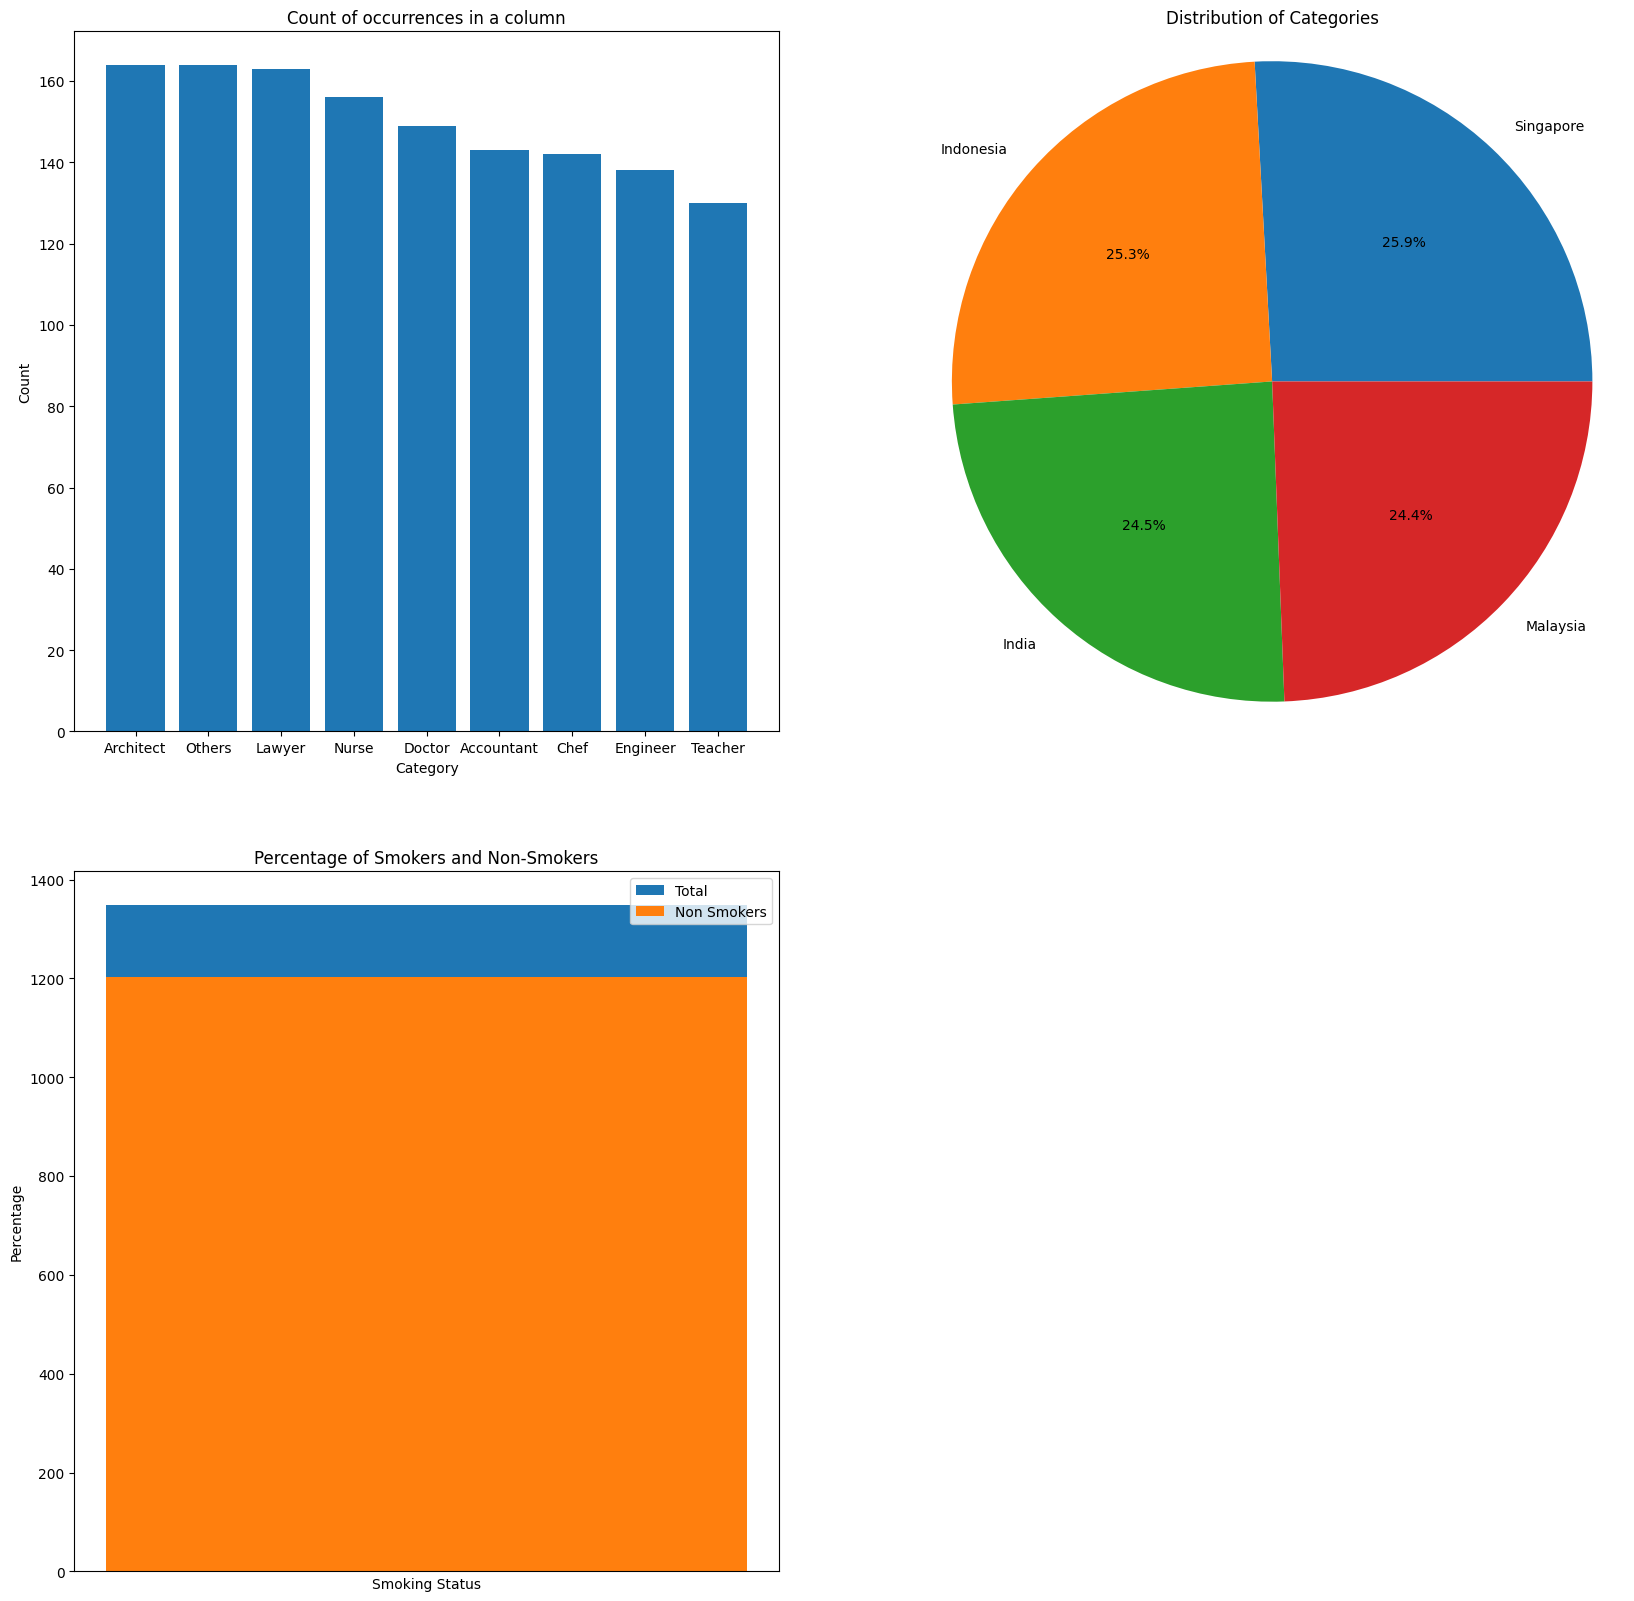

In [28]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)

#x_axi = data_30_df.occupation.drop_duplicates().values

occupation_counts = data_30_df.occupation.value_counts()

# Create bar chart
plt.bar(occupation_counts.index, occupation_counts.values)

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of occurrences in a column')


#2
plt.subplot(2,2,2)
country_counts = data_30_df.country.value_counts()

# Create pie chart
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.subplot(2,2,3)
smoke_counts = data_30_df['smoke'].value_counts()

plt.bar(0, smoke_counts.sum(), label='Total')
plt.bar(0, smoke_counts[0], label='Non Smokers')


# Calculate percentages
#total = sum(smoke_counts)
#percentages = {key: (value / total) * 100 for key, value in smoke_counts.items()}

# Create bar chart
plt.xlabel('Smoking Status')
plt.ylabel('Percentage')
plt.title('Percentage of Smokers and Non-Smokers')
plt.legend()
plt.xticks([])

plt.show()